<a href="https://colab.research.google.com/github/ishita164/DataAnalytics/blob/Experiments/2019130039_Part(II)_OEIT6_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Fitter

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import ttest_1samp


In [ ]:
data = pd.read_csv('bestsellers with categories.csv')
data.head


<bound method NDFrame.head of                                                   Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson    

In [ ]:
data.shape

(550, 7)

In [ ]:
data.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [ ]:
data.isnull()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
545,False,False,False,False,False,False,False
546,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [ ]:
data.dropna(how = 'any', inplace = True )

In [ ]:
data.shape

(550, 7)

In [ ]:
data.duplicated().sum()

0

In [ ]:
print(data['Reviews'].mean())

11953.281818181818


# Normal distribution Checking and Tranformation

In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


User Rating   -1.502125
Reviews        2.421597
Price          3.685057
Year           0.000000
dtype: float64


*   The variables with skewness > 1 are highly positively skewed.
*   The variables with skewness < -1 are highly negatively skewed.
*   The variables with 0.5 < skewness < 1 are moderately positively skewed.
*   The variables with -0.5 < skewness < -1 are moderately negatively skewed.
*   And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed.

In [ ]:
def plotvariale(df, variable):
    plt.figure(figsize=(14,8))
    plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
    df[variable].hist(bins=30)
    
    ## QQ plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


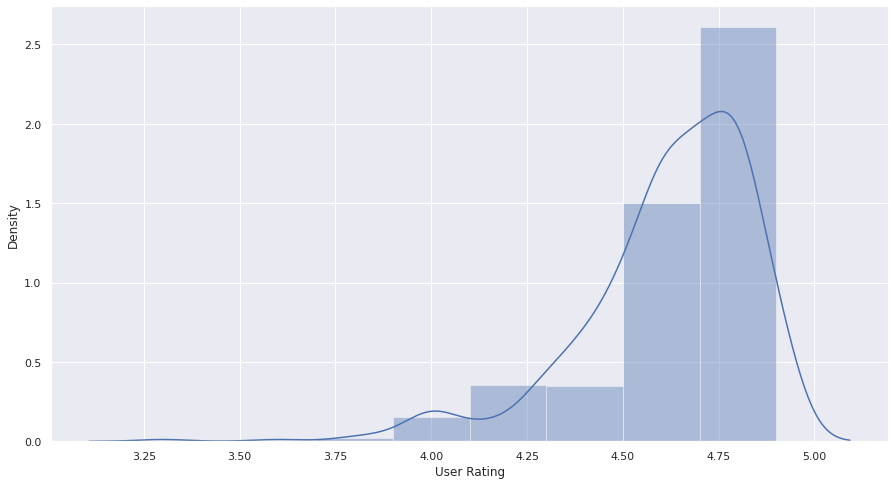

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(data['User Rating'],bins=8)

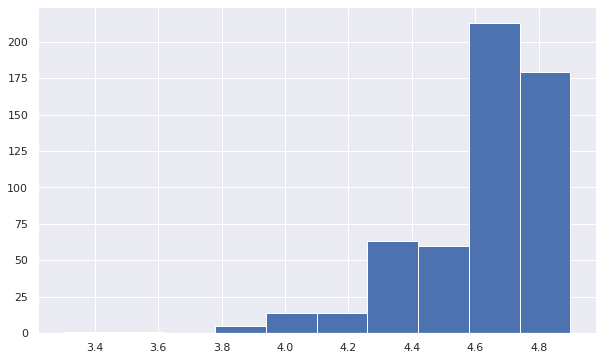

In [ ]:
data['User Rating'].hist(figsize=(10,6))

selected value for lambda is  12.4746576764987


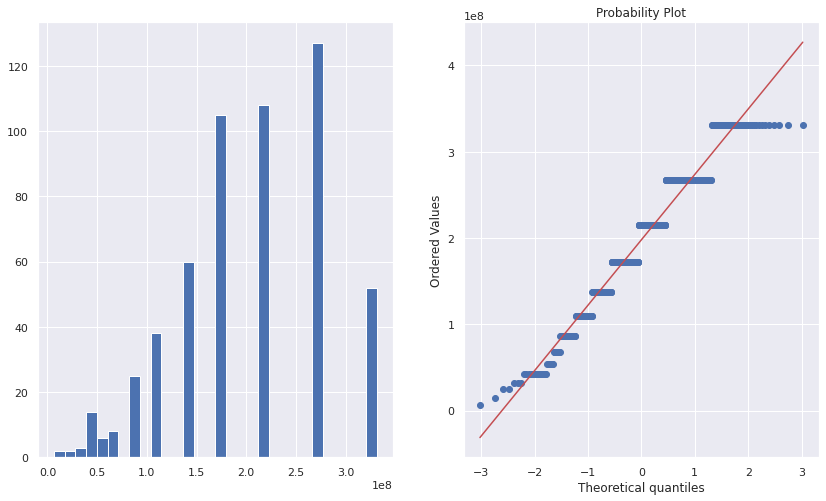

In [ ]:
data["User Rating"], lambdavalue = stats.yeojohnson(data['User Rating'])
print("selected value for lambda is " , lambdavalue)
plotvariale(data, 'User Rating')

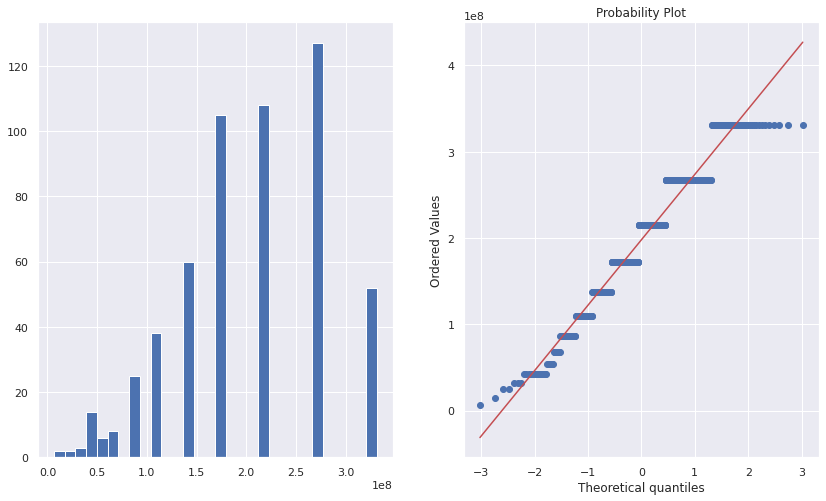

In [ ]:
plotvariale(data, 'User Rating')

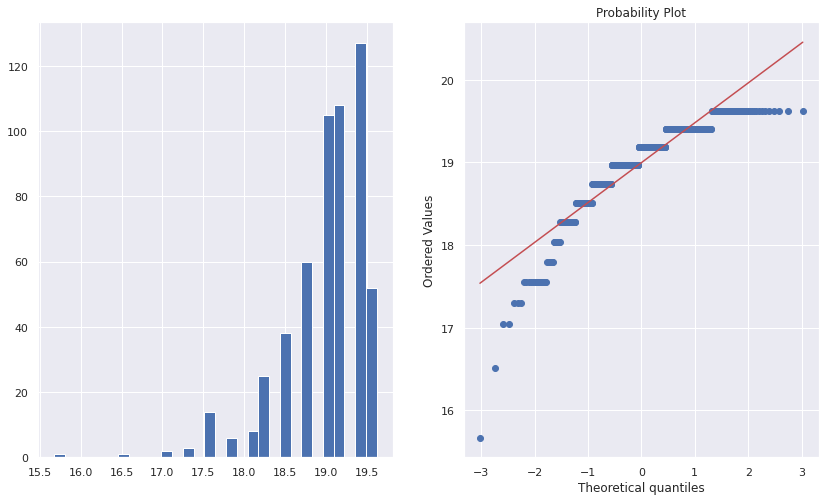

In [ ]:
data['User Rating'] =np.log(data['User Rating'])
plotvariale(data, 'User Rating')

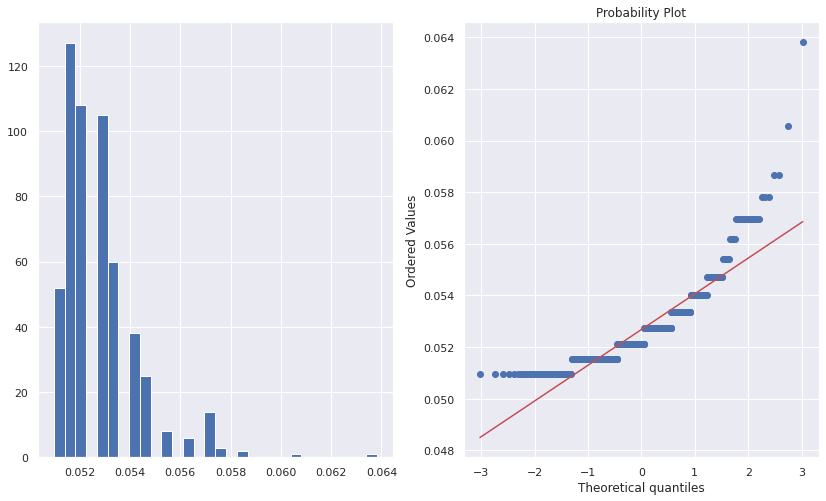

In [ ]:
data['User Rating'] =1/(data['User Rating'])
plotvariale(data, 'User Rating')

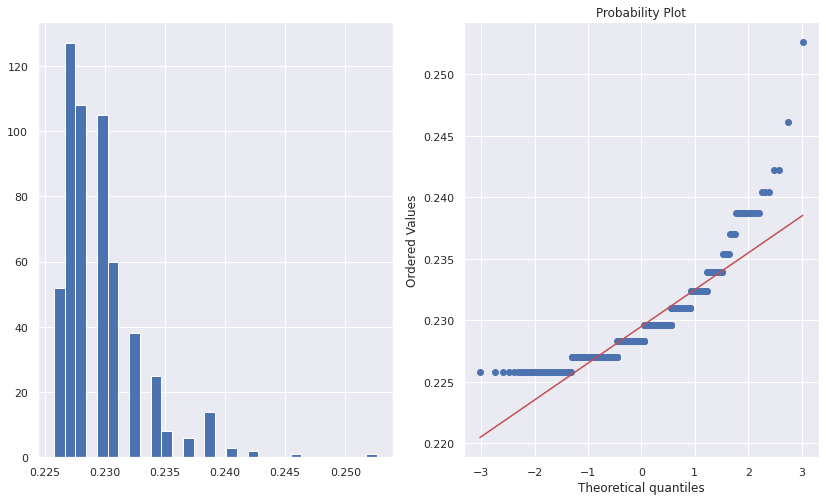

In [ ]:
data['User Rating'] =data['User Rating'] ** (1/2)
plotvariale(data, 'User Rating')

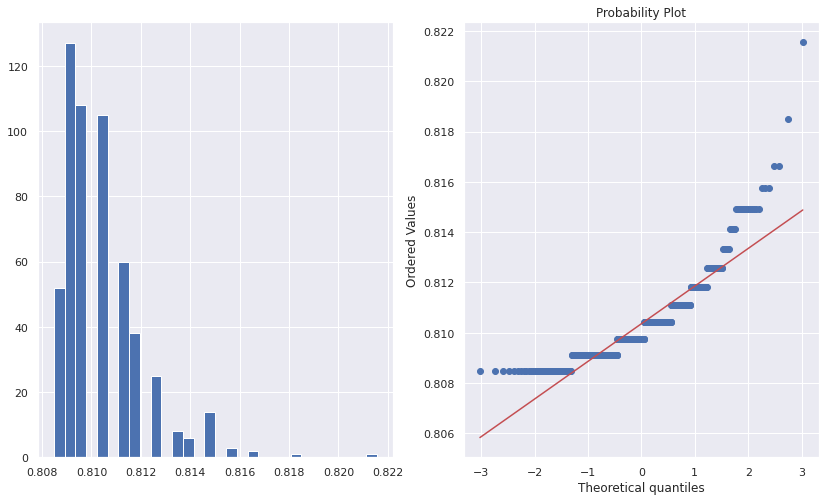

In [ ]:
data['User Rating'] =data['User Rating'] ** (1/7)
plotvariale(data, 'User Rating')

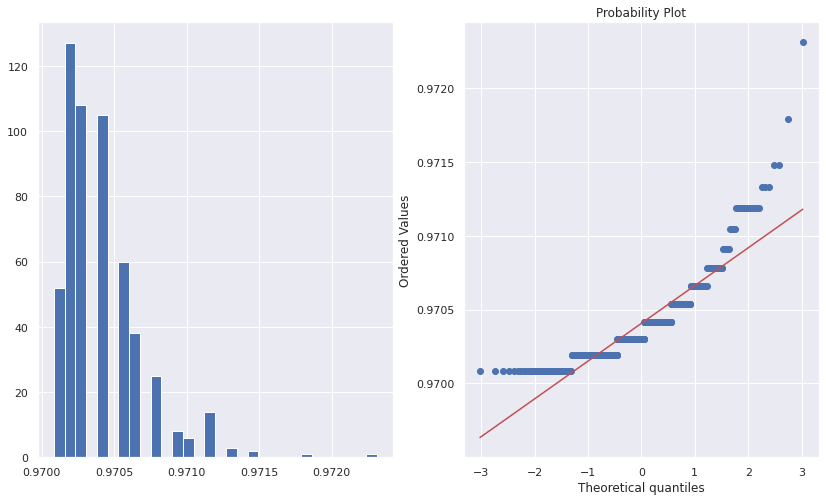

In [ ]:
data['User Rating'] =data['User Rating'] ** (1/7)
plotvariale(data, 'User Rating')

In [ ]:
data["User Rating"], lambdavalue = stats.boxcox(data['User Rating'])
print("selected value for lambda is " , lambdavalue)

selected value for lambda is  -1915.9141444651186


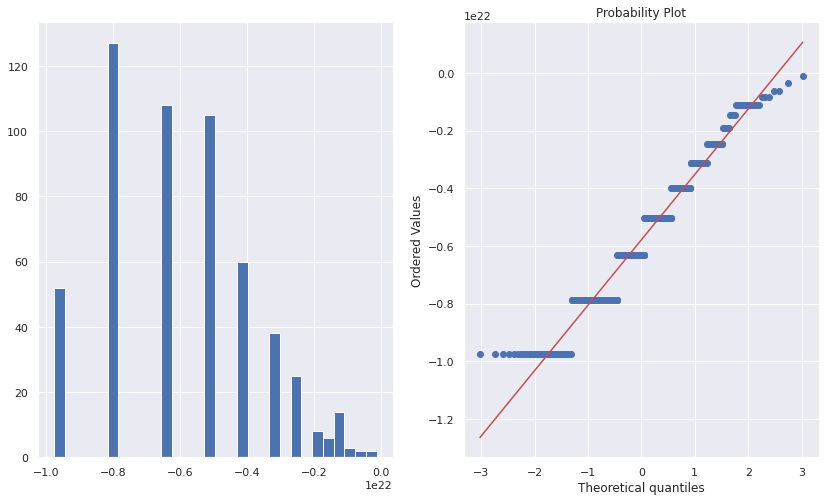

In [ ]:
plotvariale(data, "User Rating")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


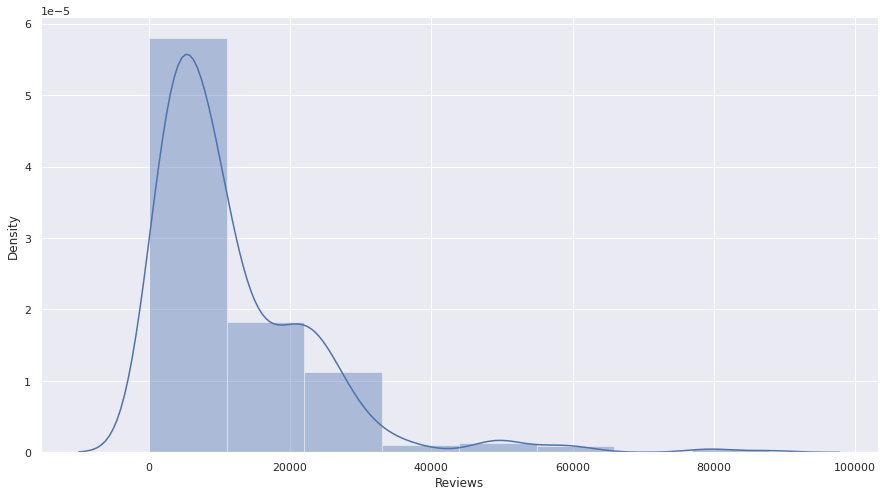

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(data['Reviews'],bins=8)

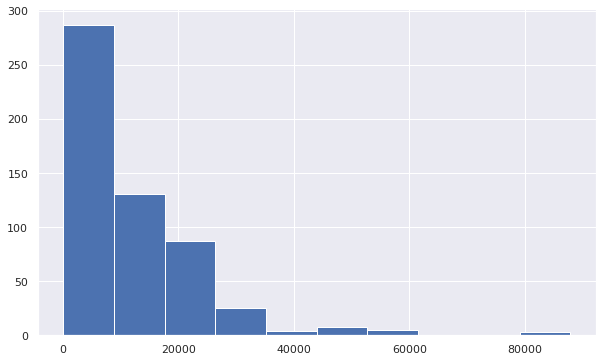

In [ ]:
data['Reviews'].hist(figsize=(10,6))

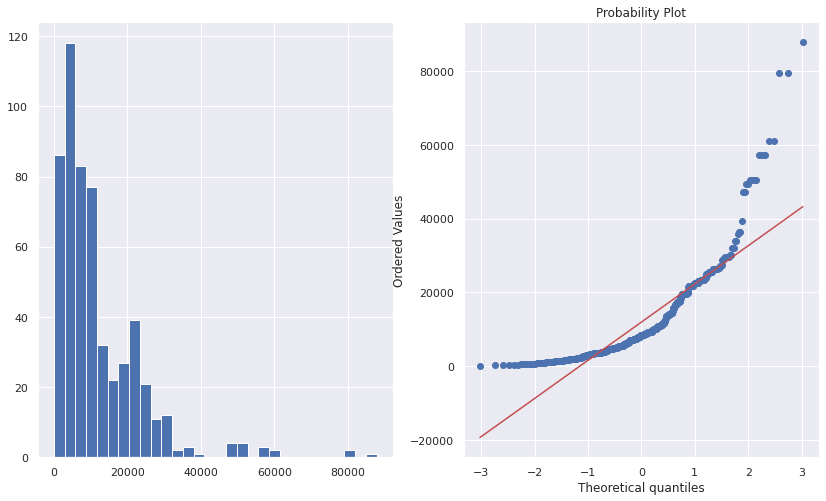

In [ ]:
plotvariale(data, 'Reviews')

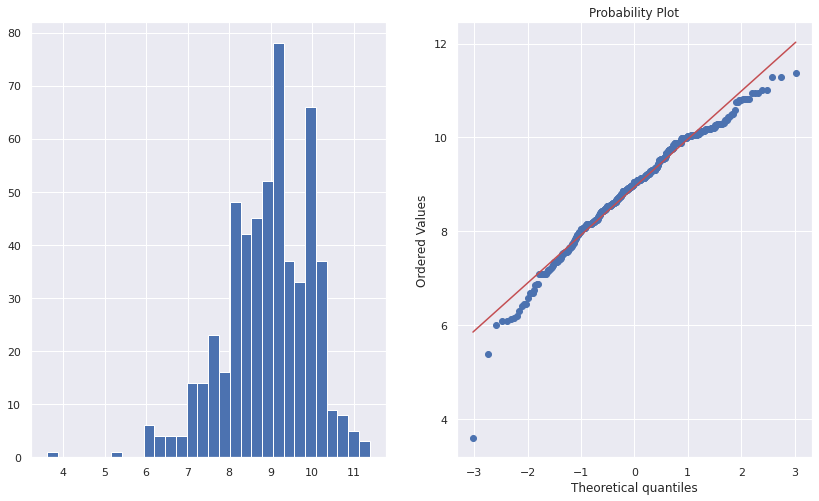

In [ ]:
data['Reviews'] =np.log(data['Reviews'])
plotvariale(data, 'Reviews')

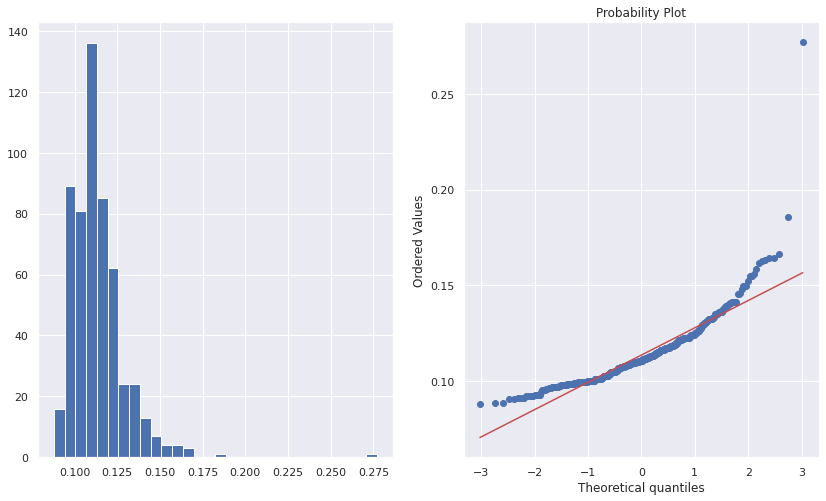

In [ ]:
data['Reviews'] =1/(data['Reviews'])
plotvariale(data, 'Reviews')

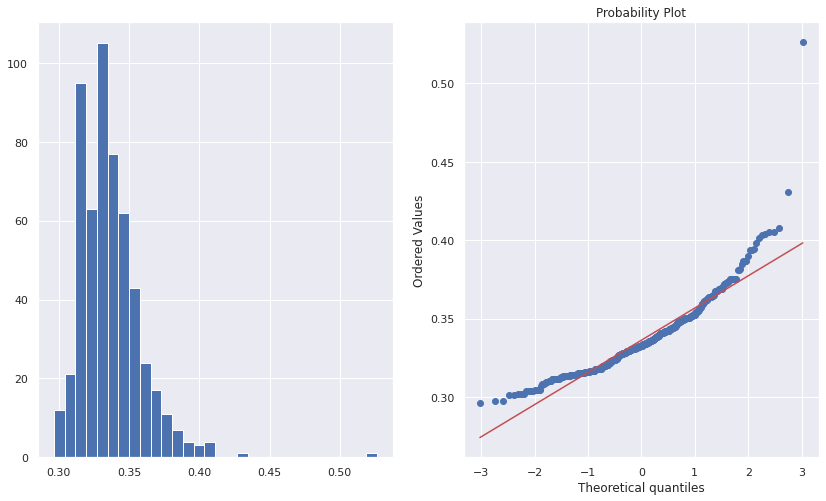

In [ ]:
data['Reviews'] =data['Reviews'] ** (1/2)
plotvariale(data, 'Reviews')

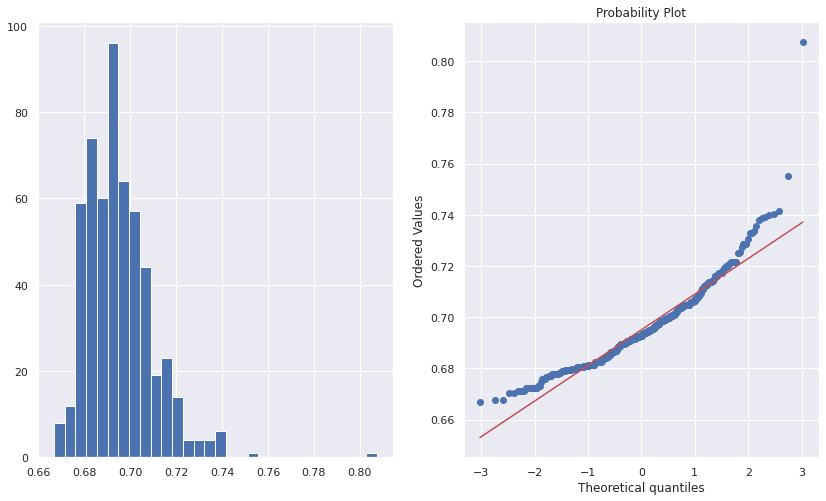

In [ ]:
data['Reviews'] =data['Reviews'] ** (1/3)
plotvariale(data, 'Reviews')

In [ ]:
data["Reviews"], lambdavalue = stats.boxcox(data['Reviews'])
print("selected value for lambda is " , lambdavalue)

selected value for lambda is  -15.17881929797881


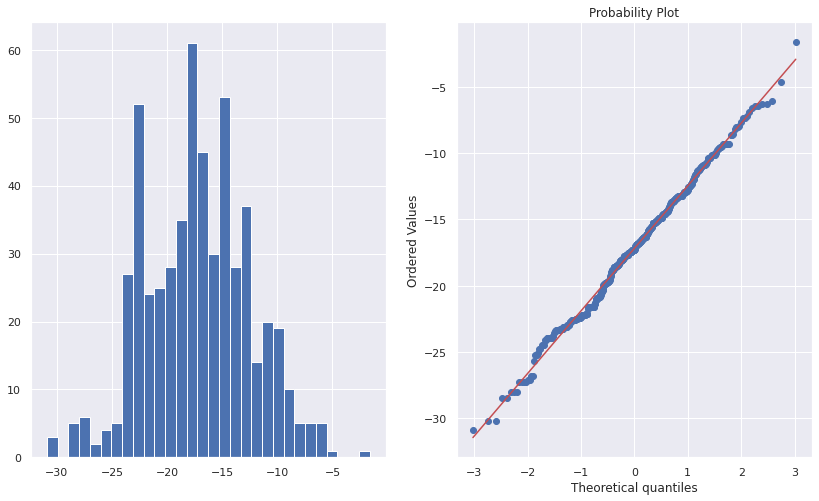

In [ ]:
plotvariale(data, "Reviews")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


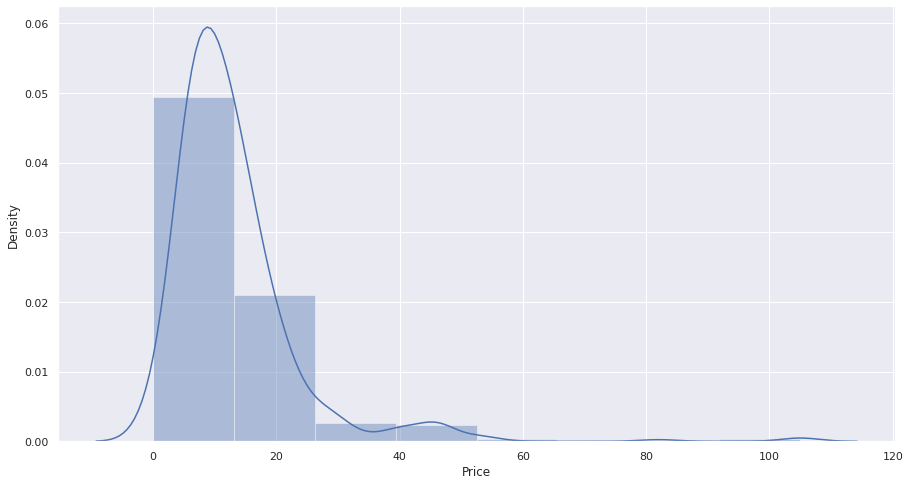

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(data['Price'],bins=8)

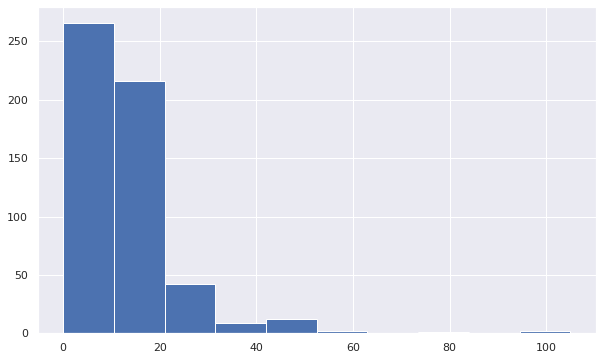

In [ ]:
data['Price'].hist(figsize=(10,6))

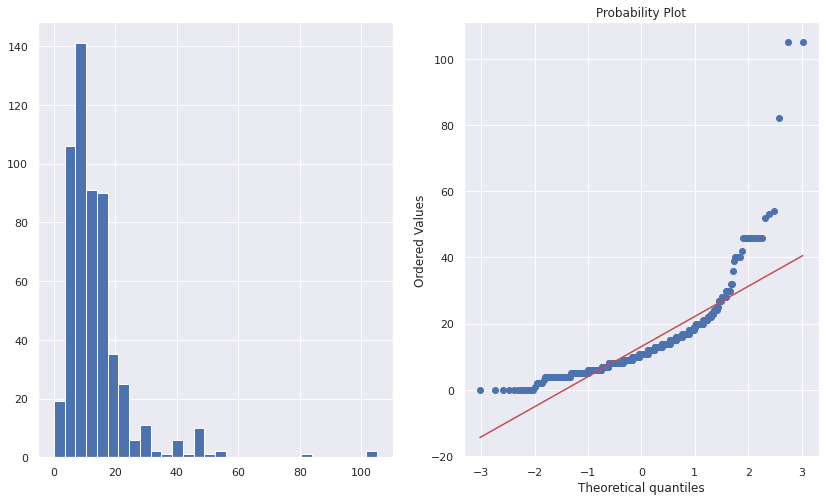

In [ ]:
plotvariale(data, "Price")

selected value for lambda is  0.1661963688631408


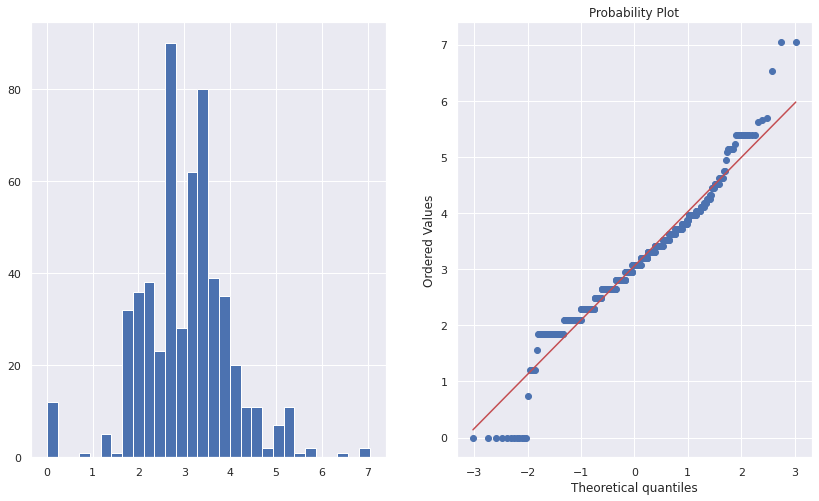

In [ ]:
data['Price'], lambdavalue = stats.yeojohnson(data['Price'])
print("selected value for lambda is " , lambdavalue)
plotvariale(data, 'Price')

In [ ]:
data.drop(data[data['Price'] == 0].index, inplace = True)


In [ ]:
data.shape

(538, 7)

selected value for lambda is  0.02184828743754286


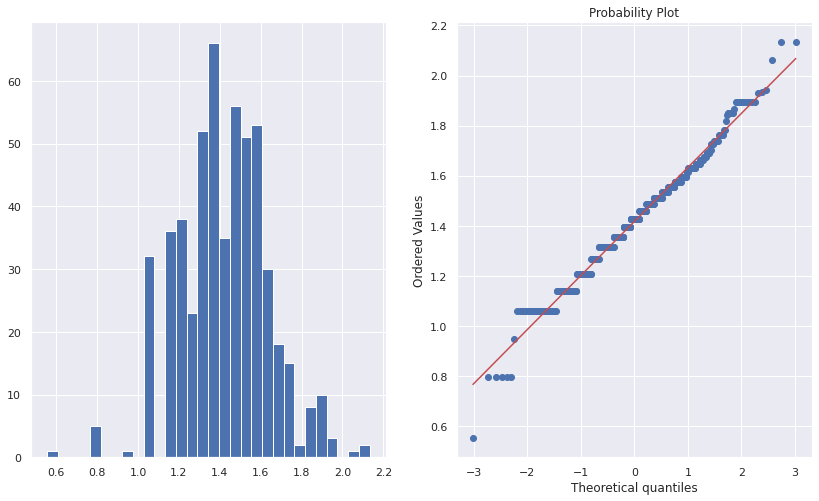

In [ ]:
data['Price'], lambdavalue = stats.yeojohnson(data['Price'])
print("selected value for lambda is " , lambdavalue)
plotvariale(data, 'Price')

#  what distribution(s) ought to be the best fit(s) for your variable(s)

{'gamma': {'a': 121.50279353130227,
  'loc': -3.1251642175741284e+22,
  'scale': 2.098664696275923e+20}}

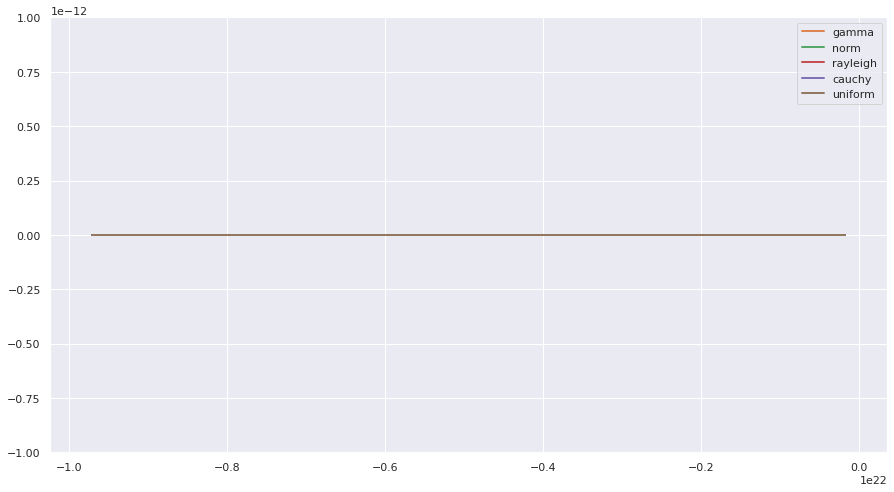

In [ ]:
tt = data["User Rating"].values
f = Fitter(tt,
           distributions= get_common_distributions())
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')


In [ ]:
f.fitted_param["gamma"]


(121.50279353130227, -3.1251642175741284e+22, 2.098664696275923e+20)

{'norm': {'loc': -17.20042657460803, 'scale': 4.694616810433503}}

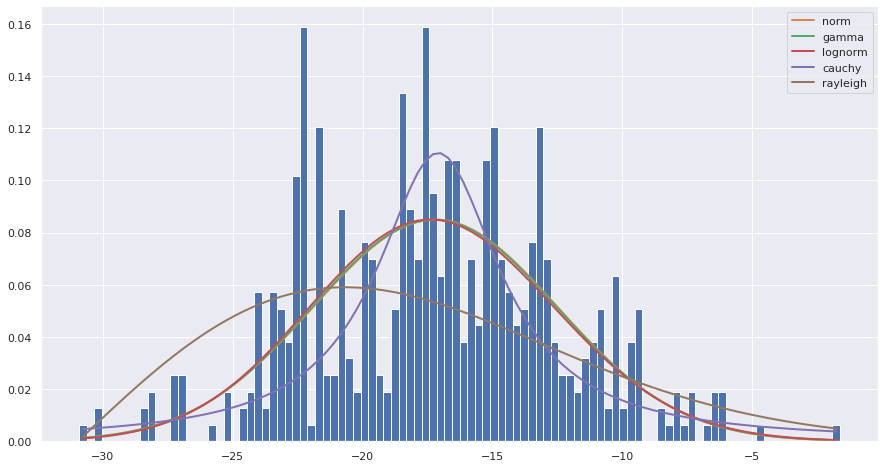

In [ ]:
tt = data["Reviews"].values
f = Fitter(tt,
           distributions= get_common_distributions())
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [ ]:
f.fitted_param["norm"]


(-17.20042657460803, 4.694616810433503)

{'norm': {'loc': 1.4170805299182778, 'scale': 0.2163684424302942}}

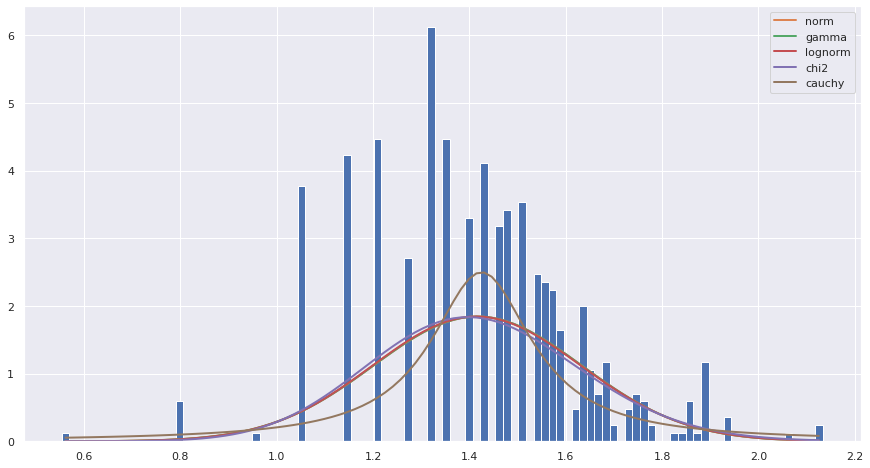

In [ ]:
tt = data["Price"].values
f = Fitter(tt,
           distributions= get_common_distributions())
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [ ]:
f.fitted_param["norm"]


(1.4170805299182778, 0.2163684424302942)

#  two-sample goodness of fit test

In [ ]:
#perform Kolmogorov-Smirnov test
ks_2samp(data['User Rating'], data['Reviews'])



Ks_2sampResult(statistic=1.0, pvalue=1e-322)

From the output we can see that the test statistic is 1.0 and the corresponding p-value is 1. Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distribution.

As from above, it is clear that data['User Rating'] is best fit for gamma distribution, whereas data['Reviews'] is best fir for normal distribution.

# one-sample goodness-of-fit test

In [ ]:
myfield1 = data["User Rating"]
myfield2 = data["Reviews"]

crosstable = pd.crosstab(myfield1,myfield2)
crosstable

Reviews,-30.901970,-30.215302,-28.467735,-28.042244,-27.230477,-27.078104,-26.812550,-25.686800,-25.184246,-25.091769,...,-7.210984,-6.884844,-6.582666,-6.470364,-6.407063,-6.288999,-6.276972,-6.091454,-4.614452,-1.630115
User Rating,,,,,,,,,,,,,,,,,,,,,
-9.756799e+21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7.879731e+21,1,0,2,0,0,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
-6.324833e+21,0,0,0,0,4,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
-5.044084e+21,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,1,1
-3.995424e+21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
-3.142178e+21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
-2.452526e+21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1.899000e+21,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
-1.458018e+21,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
obs=crosstable.values

In [ ]:
chiVal, pVal, df, exp= chi2_contingency(crosstable)
chiVal, pVal, df, exp

(6961.7935636783,
 2.30030132739655e-122,
 4381,
 array([[0.09479554, 0.18959108, 0.18959108, ..., 0.09479554, 0.09479554,
         0.09479554],
        [0.22118959, 0.44237918, 0.44237918, ..., 0.22118959, 0.22118959,
         0.22118959],
        [0.19888476, 0.39776952, 0.39776952, ..., 0.19888476, 0.19888476,
         0.19888476],
        ...,
        [0.00371747, 0.00743494, 0.00743494, ..., 0.00371747, 0.00371747,
         0.00371747],
        [0.00185874, 0.00371747, 0.00371747, ..., 0.00185874, 0.00185874,
         0.00185874],
        [0.00185874, 0.00371747, 0.00371747, ..., 0.00185874, 0.00185874,
         0.00185874]]))

The first value is the chi-square value of 6961.793 . The chance of such a value or even more extreme, in a sample, if there is no association in the population is 2.30030132739655e-122 (the second value). This is known as the p-value or significance. It is considered 'significant' usually if this value is below 0.05, which in this case it is. This indicates then an association between the two variables (one has an impact on the other).

The third value is the degrees of freedom, which is an indication of the size of the table, since it is simply the number of rows - 1, times the number of columns - 1.

The last array are the so called expected values. These are the counts to be expected if the two variables had no influence on each other.


H0: (null hypothesis) A variable follows a hypothesized distribution.
H1: (alternative hypothesis) A variable does not follow a hypothesized distribution.
Since the p-value  2.30030132739655e-122  is less than 0.05, we reject the null hypothesis.

In [ ]:
n_r =len(crosstable.iloc[0:2,0])
n_c =len(crosstable.iloc[0,0:2])
ddof=(n_r -1)*(n_c -1)

alpha=0.05
ddof

1

In [ ]:
chi_square=sum([(o-e)**2./e for o,e in zip(obs,exp)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)


chi-square statistic:- 180.85434173669464


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)


p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [ ]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


User Rating    0.121836
Reviews        0.020094
Price          0.000964
Year           0.001073
dtype: float64


*   The variables with skewness > 1 are highly positively skewed.
*   The variables with skewness < -1 are highly negatively skewed.
*   The variables with 0.5 < skewness < 1 are moderately positively skewed.
*   The variables with -0.5 < skewness < -1 are moderately negatively skewed.
*   And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         538 non-null    object 
 1   Author       538 non-null    object 
 2   User Rating  538 non-null    float64
 3   Reviews      538 non-null    float64
 4   Price        538 non-null    float64
 5   Year         538 non-null    int64  
 6   Genre        538 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 33.6+ KB


# Hypothesis testing

In [ ]:
import numpy as np

def hypo(df):
  df_mean = np.mean(df)
  print(df_mean)
  tset, pval = ttest_1samp(df, 30)
  print("p-values: ",pval)
  if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
  else:
    print("we are accepting null hypothesis")

In [ ]:
print("User Rating:")
hypo(data['User Rating'])
print("-------------------------")
print("Reviews:")
hypo(data['Reviews'])
print("-------------------------")
print("Price:")
hypo(data['Price'])
print("-------------------------")

User Rating:
-5.75410762494121e+21
p-values:  3.2073785450396196e-232
 we are rejecting null hypothesis
-------------------------
Reviews:
-17.20042657460804
p-values:  0.0
 we are rejecting null hypothesis
-------------------------
Price:
1.4170805299182785
p-values:  0.0
 we are rejecting null hypothesis
-------------------------
